## Plan Semilla 2021 - 2


<img src="https://asesoftware.sharepoint.com/:i:/r/sites/PreventaAI/Documentos%20compartidos/6.Recursos%20Gra%CC%81ficos%20Imagen%20Equinox/Logo%20Equinox/Logo%20Equinox%20Original%201.png?csf=1&web=1&e=sa5TIy" width="200">


# Computer vision

<img src="https://asesoftware.sharepoint.com/:i:/r/sites/PreventaAI/Documentos%20compartidos/6.Recursos%20Gra%CC%81ficos%20Imagen%20Equinox/Logos%20Servicios/Computer%20Vision.png?csf=1&web=1&e=ehW0EZ" width="200"> 


## Convolutional Neural Network

<img src="https://asesoftware.sharepoint.com/:i:/r/sites/PreventaAI/Documentos%20compartidos/6.Recursos%20Gra%CC%81ficos%20Imagen%20Equinox/Ada/Ada%2011.png?csf=1&web=1&e=6ajN8q" width="200"> 

## Import Libraries

In [ ]:
## Handwritten digits images
from keras.datasets import mnist 
## Use of the library within the NoteBook to avoid opening additional windows when viewing
%matplotlib inline 
## Information display library
import matplotlib.pyplot as plt 
## Optimized number processing library
import numpy as np
## Deep learning model library
import tensorflow
from random import randint

## Import Dataset

In [ ]:
## Split of the data set in training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Briefly review the content of the Data Set

Images shapes:  (28, 28)


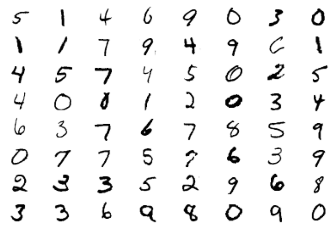

In [ ]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(X_train[randint(0, X_train.shape[0])], cmap='Greys')
print('Images shapes: ',X_train[0].shape)

## Image preprocessing

At this point it is necessary to give the correct format to the data set to be able to process it in the neural network to be created, in this case it is necessary to modify the dimensions of the data set.

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

## standardization


In [ ]:
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)
X_train /= 255
X_test /= 255

## Model creation

This model is optimized and tested by different tests from other developers, so the hyperparameters have been carefully chosen to obtain good results, however, we encourage you to investigate and modify the model so that you yourself understand the effect of using other hyperparameters.

In [ ]:
## Different hyperparameters are used in this network, they are imported below
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))

## Filters in an image(Conv2d)

A convolutional layer applies different filters, that is, different kernels of the same dimensions, which means that as a result there is an equal number of images as filters were applied, where each filter highlights specific characteristics, the values of these filters are as follows that are modified in the network training process.

![Conv2d](https://www.researchgate.net/publication/334819564/figure/fig1/AS:786909211152384@1564625184974/Input-and-output-feature-maps-of-a-convolutional-layer.png)

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))

## Image size modification (MaxPooling2D)


The size of the image is modified, reducing it as the filters are increased, this allows to emphasize the relevant characteristics.

This filter takes the highest value that is evaluated in the filter.

![MaxPooling2D](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

## Neuron Dropout

This allows to reduce the learning of some neurons in a random way, which translates into better generalization of learning and less overfitting, this is recommended in large data sets.

![Dropout](https://www.researchgate.net/profile/Amine_Ben_khalifa/publication/309206911/figure/fig3/AS:418379505651712@1476760855735/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network.png)

In [ ]:
model.add(Dropout(0.25))

## Flatten

Modify the shape of the data, from a 9x9 image to a 1x81 image

![Flattening](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [ ]:
model.add(Flatten())

## Dense

These layers reduce the number of elements that are being processed, initially it is modified to generate an output of 128 this by means of a ReLU activation layer, later a new layer is added with 10 output elements, which will be the final digits in a configuration softMax what this means is that only one of the 10 options will be correct at a time.

In [ ]:
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax')) 

## Network compilation

Once the network structure is defined, it is necessary to compile it, for this it is necessary to determine some additional factors. In the theory of neural networks, it is explained that it is necessary to know the error between the initial result of the network and the expected one, since there is an error from this difference. This error must be supported in one of the characteristics, in this case the metric is the "accuracy" and the error is calculated by means of a loss function in this case "sparse_categorical_crossentropy" and the optimization function "adam".

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

## Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Training

Finally, it is determined what will be the batch size and the number of epochs

The batch_size refers to how many images will be evaluated by each group on the network, so many groups of this size will be evaluated until the training data set is completely traversed. Once the entire dataset is traversed, an epoch will have been completed, which means that all elements of the training dataset will be evaluated 10 times.

In [ ]:
batch_size = 128 #128
epochs = 10

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 - 36s - loss: 0.2495 - accuracy: 0.9246 - val_loss: 0.0512 - val_accuracy: 0.9828
Epoch 2/10
469/469 - 6s - loss: 0.0899 - accuracy: 0.9733 - val_loss: 0.0400 - val_accuracy: 0.9869
Epoch 3/10
469/469 - 6s - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0346 - val_accuracy: 0.9881
Epoch 4/10
469/469 - 6s - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 5/10
469/469 - 6s - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0334 - val_accuracy: 0.9897
Epoch 6/10
469/469 - 6s - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 7/10
469/469 - 6s - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 8/10
469/469 - 6s - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 9/10
469/469 - 6s - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0297 - val_accuracy: 0.9919
Epoch 10/10
469/469 - 6s - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0297 - val_accuracy: 0.992

## Results

In [ ]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9920


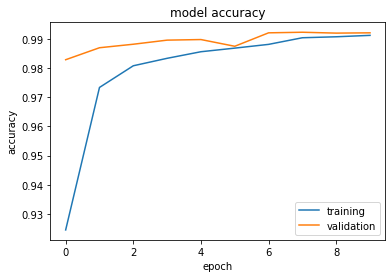

Test loss: 0.0297
Test accuracy: 0.992


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Inference

(28, 28, 1)


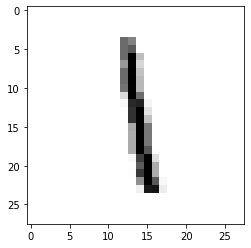

Predicted Number:  1


In [ ]:
test_img = randint(0,X_test.shape[0])
X_test_img = X_test[test_img].copy()
print(X_test_img.shape)
plt.imshow(X_test_img.squeeze(), cmap='Greys') 
plt.show()
pred_img = X_test[test_img].reshape(1,X_test[test_img].shape[0],X_test[test_img].shape[1],1)
prediction = model.predict(pred_img)
print('Predicted Number: ', prediction.argmax())

[CNN Visualization](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)